In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv(r"C:\Users\admin\Downloads\Mine_Dataset.csv")

In [4]:
df.head()

,V,H,S,M
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [5]:
df.shape

(338, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
 3   M       338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


In [7]:
df.describe()

,V,H,S,M
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


In [11]:
df.rename(columns={'V':'Voltage','H':'Height_from_Ground(cm)','S':'Soil_type','M':'Mine_Type'},inplace=True)


In [12]:
df.sample(10)

,Voltage,Height_from_Ground(cm),Soil_type,Mine_Type
126,0.483383,0.454545,0.4,3
300,0.333685,0.818182,0.6,4
232,0.244713,0.909091,0.6,1
118,0.483383,0.272727,0.8,3
128,0.362537,0.727273,0.4,3
327,0.391178,0.272727,0.8,5
178,0.332326,0.545455,1.0,4
184,0.277945,0.272727,0.0,5
317,0.296072,0.363636,0.0,5
280,0.395770,0.272727,0.2,3


In [52]:
df1=df.copy()

In [53]:
df1['Mine_Type'] = df1['Mine_Type'].astype(str)
df1['Soil_type'] = df1['Soil_type'].astype(str)

In [54]:
df1.describe()

,Voltage,Height_from_Ground(cm)
count,338.000000,338.000000
mean,0.430634,0.508876
std,0.195819,0.306043
min,0.197734,0.000000
25%,0.309737,0.272727
50%,0.359516,0.545455
75%,0.482628,0.727273
max,0.999999,1.000000


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Voltage                 338 non-null    float64
 1   Height_from_Ground(cm)  338 non-null    float64
 2   Soil_type               338 non-null    object 
 3   Mine_Type               338 non-null    object 
dtypes: float64(2), object(2)
memory usage: 10.7+ KB


In [61]:
df1['Mine_Type'] = df1['Mine_Type'].replace({'1': 'Null', '2': 'Anti-Tank', '3': 'Anti-personnel', '4': 'Booby-Trapped_Anti-personnel', '5': 'M14 Anti-personnel'})
df1.sample(4)

,Voltage,Height_from_Ground(cm),Soil_type,Mine_Type
322,0.401812,0.636364,0.6,M14 Anti-personnel
129,0.352749,0.909091,0.4,Anti-personnel
221,0.323262,0.545455,1.0,M14 Anti-personnel
235,0.280966,0.636364,0.2,Null


In [65]:
df1['Soil_type'] = df1['Soil_type'].replace({'0.0': 'Dry and Sandy', '0.2': 'Dry and Humus', '0.4': 'Dry and Limy', '0.6': 'Humid and Sandy', '0.8': 'Humid and Humus','1.0':'Humid and Limy'})
df1.sample(4)

,Voltage,Height_from_Ground(cm),Soil_type,Mine_Type
292,0.404833,0.636364,Humid and Limy,Anti-personnel
50,0.906343,0.363636,Dry and Sandy,Anti-Tank
120,0.386707,0.545455,Humid and Humus,Anti-personnel
49,0.999999,0.272727,Dry and Sandy,Anti-Tank


In [66]:
df1.sample(5)

,Voltage,Height_from_Ground(cm),Soil_type,Mine_Type
232,0.244713,0.909091,Humid and Sandy,Null
183,0.311178,0.181818,Dry and Sandy,M14 Anti-personnel
41,0.295015,0.181818,Humid and Limy,Null
116,0.574017,0.000000,Humid and Humus,Anti-personnel
104,0.384622,0.454545,Humid and Sandy,Anti-personnel


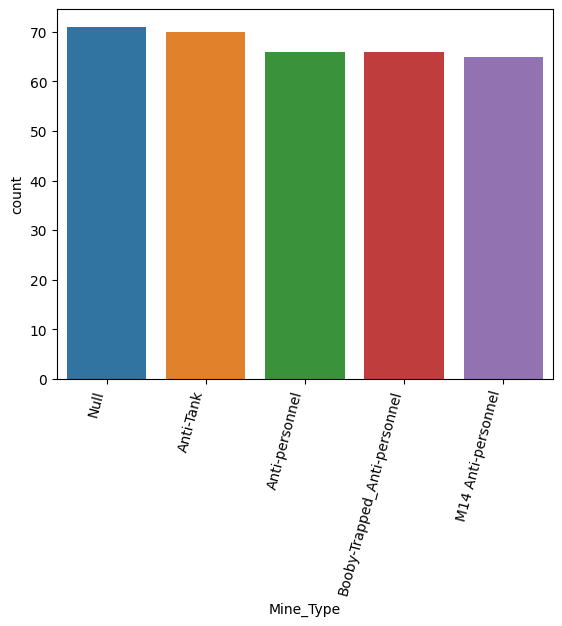

In [84]:
sns.countplot(x=df1['Mine_Type'],hue=df1['Mine_Type'],legend=False)
plt.xticks(rotation=75, ha='right') 
plt.show()

In [73]:
df1['Mine_Type'].value_counts()

Mine_Type
Null                            71
Anti-Tank                       70
Anti-personnel                  66
Booby-Trapped_Anti-personnel    66
M14 Anti-personnel              65
Name: count, dtype: int64

<Axes: ylabel='count'>

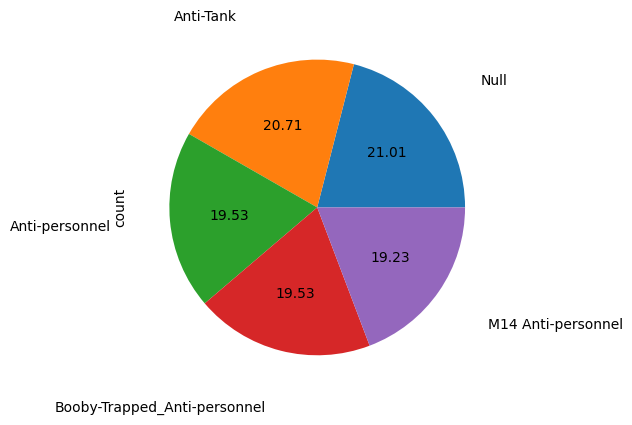

In [81]:
df1['Mine_Type'].value_counts().plot(kind='pie',autopct='%.2f',labeldistance=1.4)

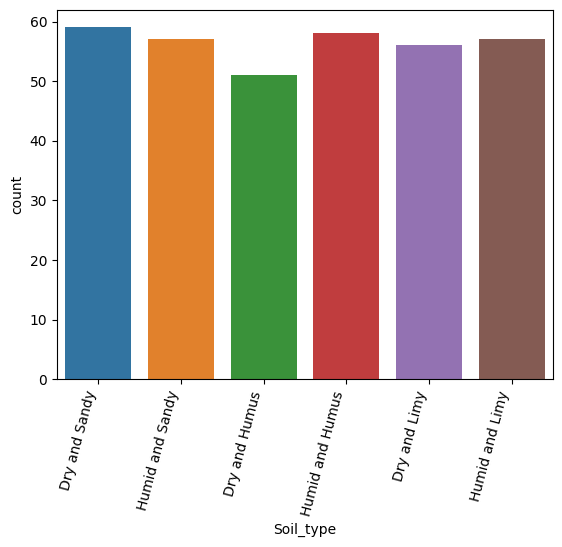

In [83]:
sns.countplot(x=df1['Soil_type'],hue=df1['Soil_type'])
plt.xticks(rotation=75, ha='right')  
plt.show()

<Axes: xlabel='Voltage', ylabel='Count'>

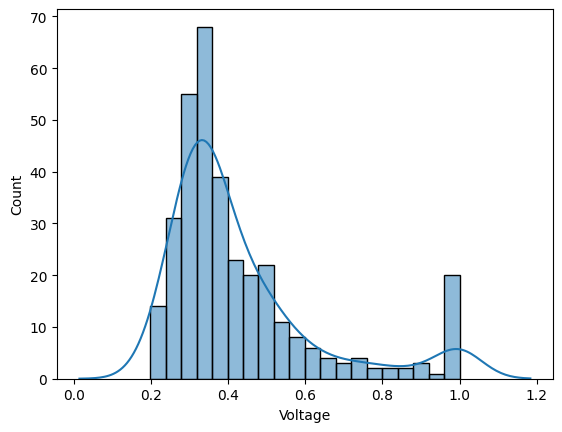

In [85]:
sns.histplot(
    df1["Voltage"], kde=True,
    stat='count', kde_kws=dict(cut=3), bins=20
)


<Axes: xlabel='Height_from_Ground(cm)', ylabel='Count'>

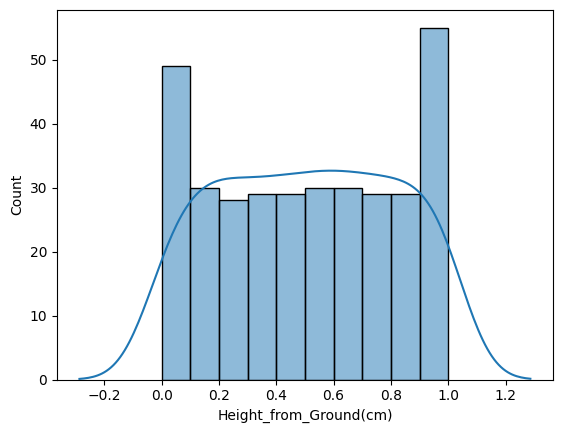

In [86]:
sns.histplot(
    df1["Height_from_Ground(cm)"], kde=True,
    stat='count', kde_kws=dict(cut=3)
)


<Axes: ylabel='Height_from_Ground(cm)'>

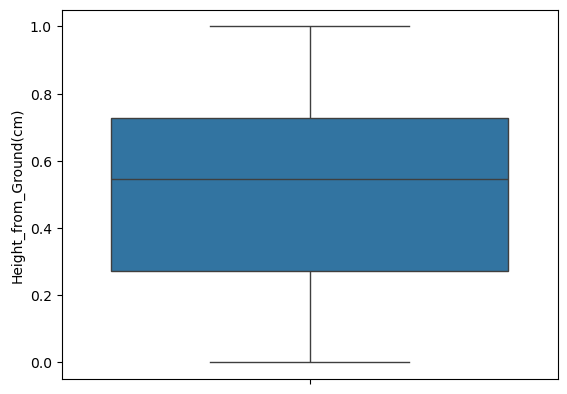

In [211]:
sns.boxplot(df1['Height_from_Ground(cm)'])

<Axes: ylabel='Voltage'>

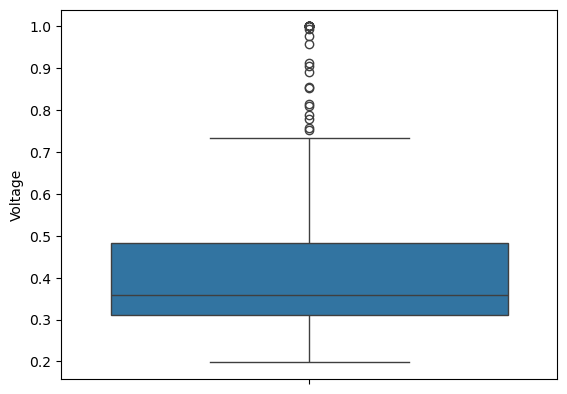

In [213]:
sns.boxplot(df1['Voltage'])

<Axes: xlabel='col_0', ylabel='Soil_type'>

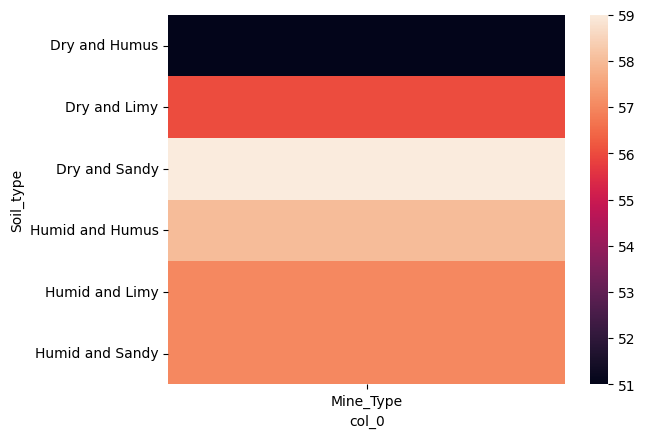

In [107]:
sns.heatmap(pd.crosstab(df1['Soil_type'],['Mine_Type']))

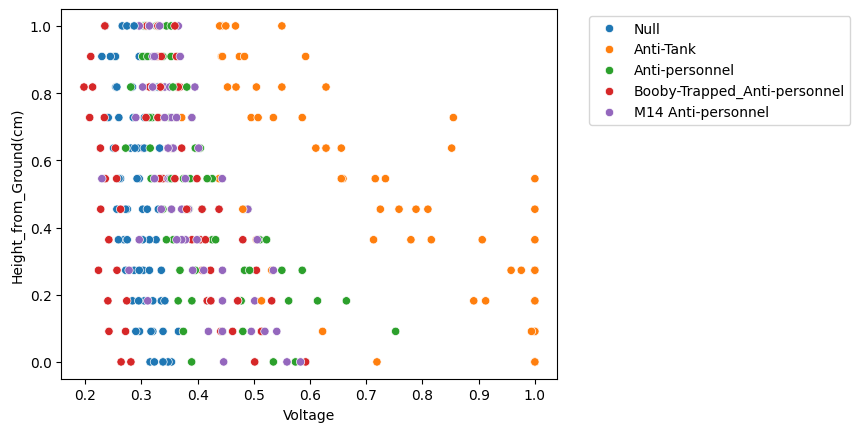

In [90]:
sns.scatterplot(x=df1['Voltage'],y=df1['Height_from_Ground(cm)'],hue=df1['Mine_Type'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

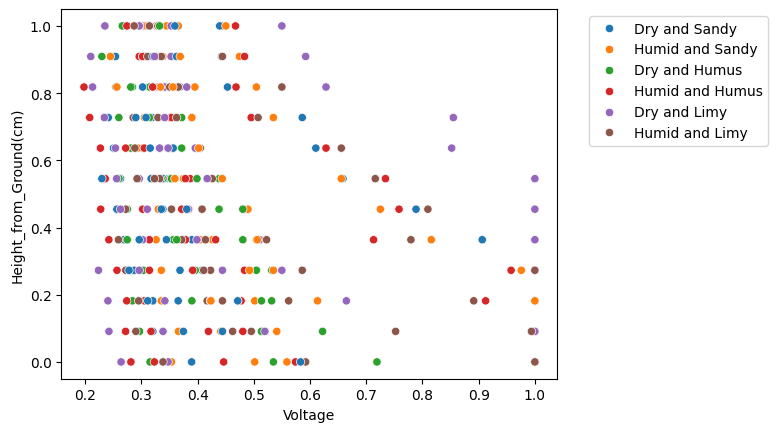

In [91]:
sns.scatterplot(x=df1['Voltage'],y=df1['Height_from_Ground(cm)'],hue=df1['Soil_type'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

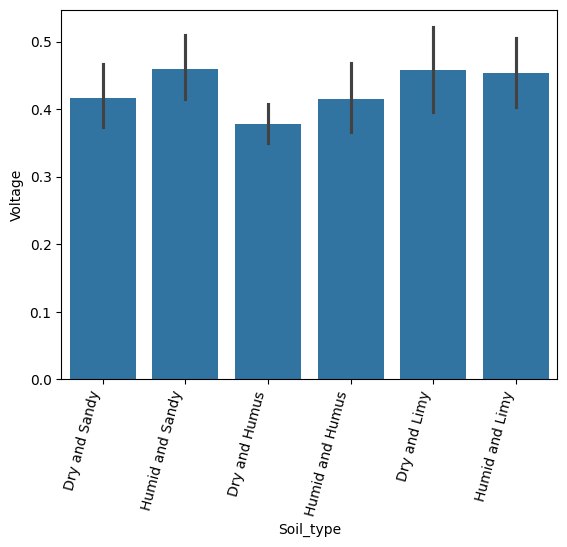

In [93]:
sns.barplot(x=df1['Soil_type'],y=df1['Voltage'])
plt.xticks(rotation=75, ha='right')  
plt.show()

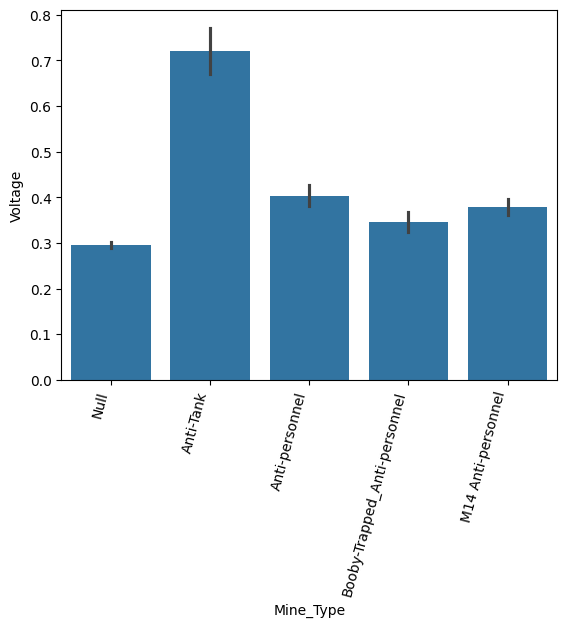

In [94]:
sns.barplot(x=df1['Mine_Type'],y=df1['Voltage'])
plt.xticks(rotation=75, ha='right')  
plt.show()

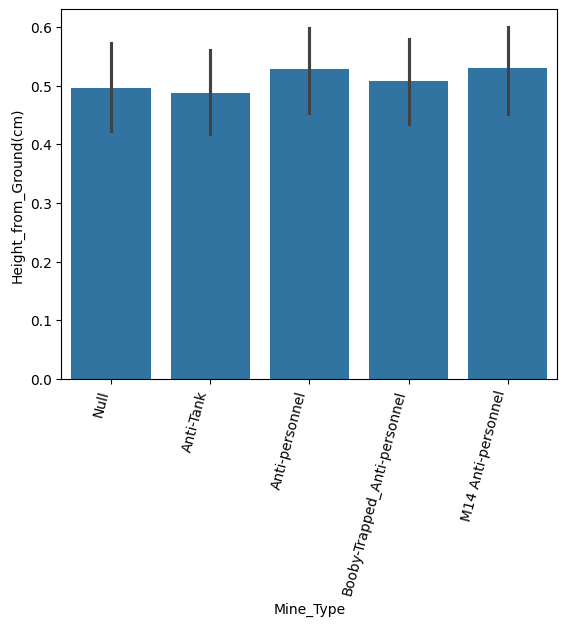

In [95]:
sns.barplot(x=df1['Mine_Type'],y=df1['Height_from_Ground(cm)'])
plt.xticks(rotation=75, ha='right')  
plt.show()

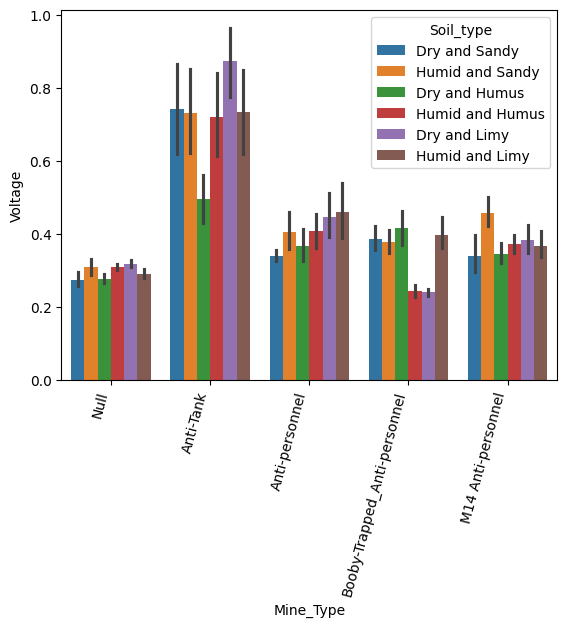

In [96]:
sns.barplot(x=df1['Mine_Type'],y=df1['Voltage'],hue=df1['Soil_type'])
plt.xticks(rotation=75, ha='right')  
plt.show()

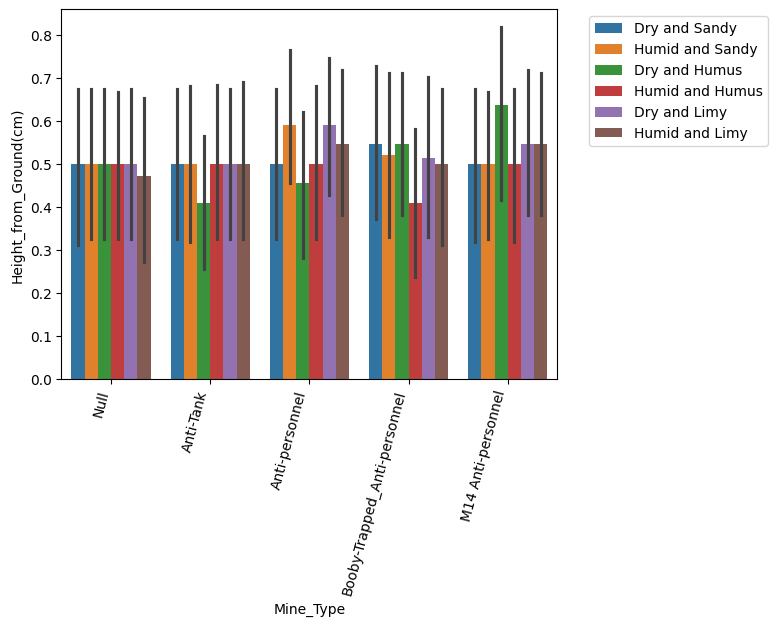

In [98]:
sns.barplot(x=df1['Mine_Type'],y=df1['Height_from_Ground(cm)'],hue=df1['Soil_type'])
plt.xticks(rotation=75, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

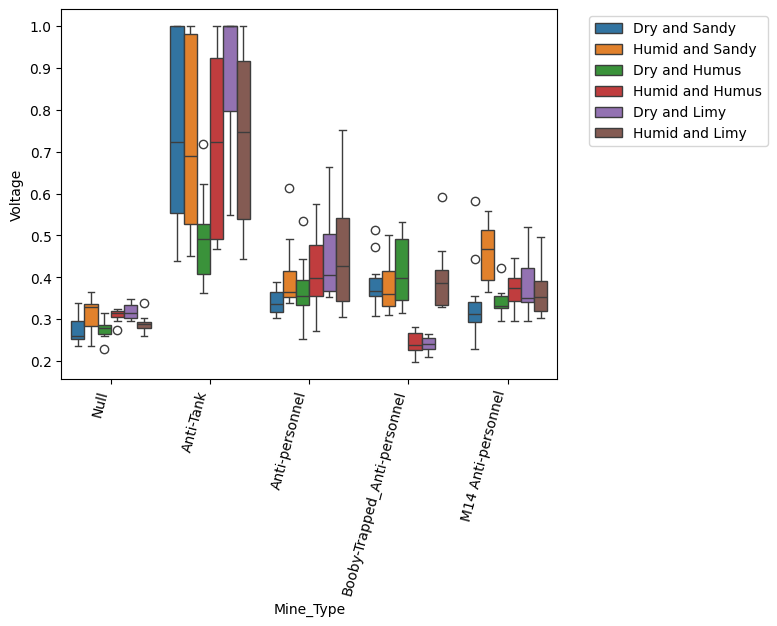

In [100]:
sns.boxplot(x=df1['Mine_Type'],y=df1['Voltage'],hue=df1['Soil_type'])
plt.xticks(rotation=75, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

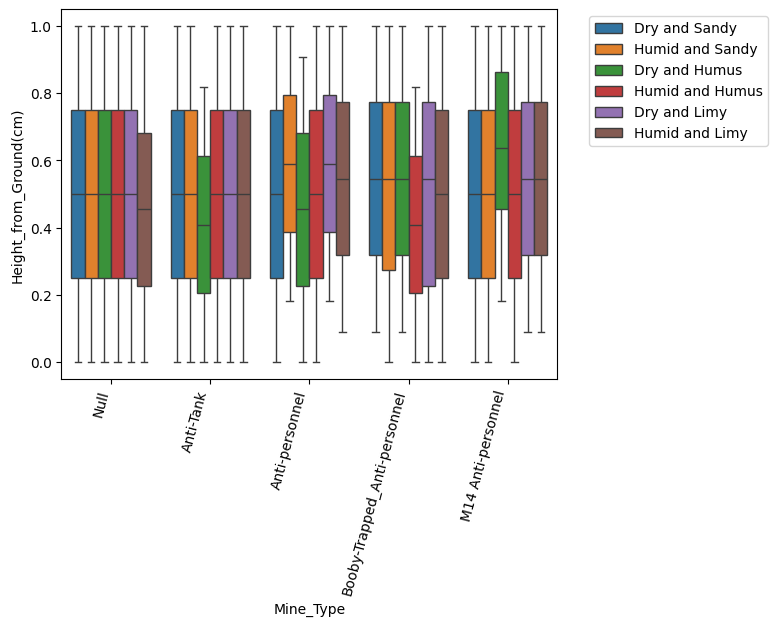

In [101]:
sns.boxplot(x=df1['Mine_Type'],y=df1['Height_from_Ground(cm)'],hue=df1['Soil_type'])
plt.xticks(rotation=75, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()

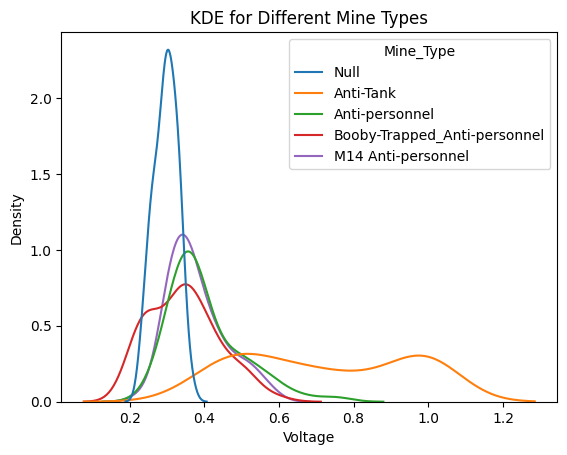

In [103]:

sns.kdeplot(df1, x=df1['Voltage'],hue=df1['Mine_Type'])
plt.title('KDE for Different Mine Types')
plt.show()


<Axes: xlabel='Height_from_Ground(cm)', ylabel='Density'>

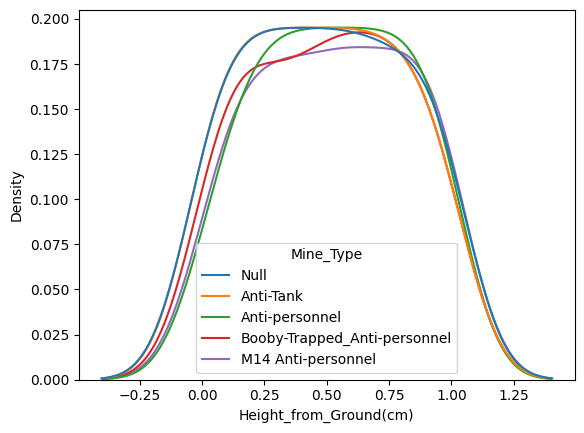

In [104]:

sns.kdeplot(df1, x=df1['Height_from_Ground(cm)'],hue=df1['Mine_Type'])
